## Make heritability figure for all tasks

In [1]:
# libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 

In [2]:
%matplotlib inline

In [3]:
# Set up the paths 
#path_root = '/media/yassine/data_disk/Drive/HCP2/'
path_root = '/home/yassinebha/data/data_disk/Drive/HCP2/'
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")
solar_out = ['subtype_5_relational_23-01-2018','subtype_5_emotion_23-01-2018',
             'subtype_5_gambling_23-01-2018','subtype_5_language_23-01-2018',
             'subtype_5_motor_23-01-2018','subtype_5_social_23-01-2018',
             'subtype_5_wm_23-01-2018']

In [4]:
list_= [pd.read_csv(os.path.join(out_path,out,'h2r_{}.csv'.format(out.split('_')[2]))) for out in solar_out]

h2r_df = pd.concat(list_,ignore_index=True)

h2r_df.head()

,Trial,Subt,H2r,P
0,REL match,sub1,0.483234,3.688557e-14
1,REL match,sub2,0.484474,3.813450e-14
2,REL match,sub3,0.354013,3.000000e-07
3,REL match,sub4,0.525551,5.417273e-17
4,REL match,sub5,0.492009,9.739519e-15


In [5]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(h2r_df['P'], alpha=0.005, method='fdr_bh')
h2r_df.insert(3,'FDR',pcorr_vec[1])
h2r_df.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))
h2r_df.insert(5,'Sig',pcorr_vec[0])
# Put Zero to Logfdr if not significant
#h2r_df.loc[h2r_df['Sig']== False,'FDR_log10'] = 0

In [6]:
h2r_df.head()

,Trial,Subt,H2r,FDR,FDR_log10,Sig,P
0,REL match,sub1,0.483234,1.634336e-13,12.786659,True,3.688557e-14
1,REL match,sub2,0.484474,1.634336e-13,12.786659,True,3.813450e-14
2,REL match,sub3,0.354013,5.400000e-07,6.267606,True,3.000000e-07
3,REL match,sub4,0.525551,4.062955e-16,15.391158,True,5.417273e-17
4,REL match,sub5,0.492009,4.869760e-14,13.312492,True,9.739519e-15


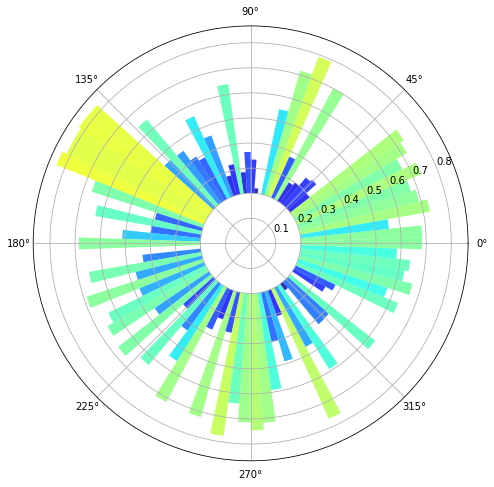

In [7]:
# main fig h2r
N = h2r_df['H2r'].shape[0]
bottom = 0.2
max_height = 1

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
radii = h2r_df['H2r']
width = (2*np.pi) / N
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.8)
#f.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/heritability/all_tasks.svg'))

In [8]:
list(h2r_df.Trial.unique())

['REL match',
 'REL relation',
 'REL contrast relation vs match',
 'EMO contrast fear vs neut',
 'GAM contrast win vs loss',
 'GAM loss',
 'GAM win',
 'LAN story',
 'MOT rf',
 'MOT lh',
 'MOT t',
 'MOT lf',
 'MOT rh',
 'SOC mental',
 'SOC contrast mental vs rnd',
 'WM 2bk',
 'WM 0bk',
 'WM contrast 2bk vs 0bk']

## PLot regular barplot fir heritability

In [9]:
dict_abbrev = {'REL match':'M',
 'REL relation':'R',
 'REL contrast relation vs match': 'M-R',
 'EMO contrast fear vs neut':'F-N',
 'GAM contrast win vs loss':'W-L',
 'GAM loss':'L',
 'GAM win':'W',
 'LAN story':'S-M',
 'MOT rf':'RF',
 'MOT lh':'LH',
 'MOT t':'T',
 'MOT lf':'LF',
 'MOT rh':'RH',
 'SOC mental':'Mt',
 'SOC contrast mental vs rnd':'Mt-R',
 'WM 2bk':'2B',
 'WM 0bk':'0B',
 'WM contrast 2bk vs 0bk':'2B-0B'}

In [10]:
#Format dataframe for the barplot
h2r_df.replace({'Trial':dict_abbrev},inplace=True)
abbrev_order = ['Mt','Mt-R','S-M','0B','2B','2B-0B','M','R','M-R','F-N','RH','LH','RF','LF','T','W','L','W-L']
h2r_df.Trial = h2r_df.Trial.astype("category")
h2r_df.Trial.cat.set_categories(abbrev_order, inplace=True)

In [24]:
h2r_df.sort_values(["Trial"],inplace=True)
h2r_df.rename(columns={"Subt":"Subtypes"},inplace=True)
h2r_df.replace({'Subtypes': {'sub1': 'S1', 'sub2': 'S2','sub3': 'S3','sub4': 'S4','sub5': 'S5'}},inplace=True)
h2r_df.head()

,Trial,Subtypes,H2r,FDR,FDR_log10,Sig,P
65,Mt,S1,0.575279,1.377649e-16,15.860861,True,1.224577e-17
66,Mt,S2,0.440498,6.103028e-09,8.214455,True,2.848080e-09
67,Mt,S3,0.513230,9.381900e-13,12.027709,True,2.918813e-13
68,Mt,S4,0.545709,1.355156e-14,13.868011,True,2.409166e-15
69,Mt,S5,0.516459,5.482953e-13,12.260985,True,1.462121e-13


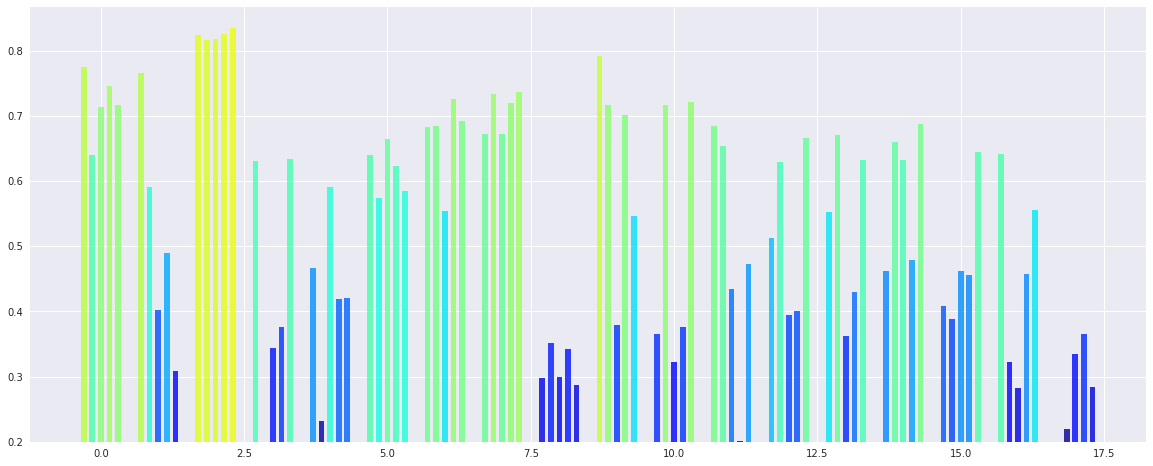

In [25]:
N = h2r_df['H2r'].shape[0]
bottom = 0.2

n_sbt = 5
n_cat = N/n_sbt
dev = np.linspace(-0.3, 0.3, n_sbt)
new_x = np.array([x+dev[dev_sbt] for x in range(int(n_cat)) for dev_sbt in range(n_sbt)])
theta = np.linspace(0.0, 0.2, N, endpoint=False)

radii = h2r_df['H2r']
width = 0.1

f = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)
bars = ax.bar(new_x, radii, width=width, bottom=bottom)
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.8)

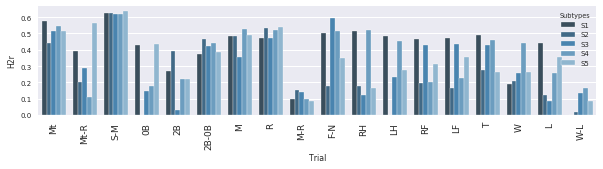

In [36]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44",
         "#c96d44"]
#coll_list = coll_ * len(df_all.Condition.unique())
coll_list = [plt.cm.jet(r,alpha=0.1) for r in h2r_df['H2r'] ]


plt.figure(figsize=(10,2))
sns.set_style("white")
sns.set(font_scale=0.7)
ax = sns.barplot(x='Trial', y='H2r', hue = 'Subtypes', palette="Blues_d", edgecolor='white', data=h2r_df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(9)

# Use custom colors and opacity
for bar in ax.artists:
    r, g, b, a = bar.get_facecolor()
    bar.set_facecolor((0, 0, 0, .1))
plt.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/heritability/all_tasks_barplot.svg'))


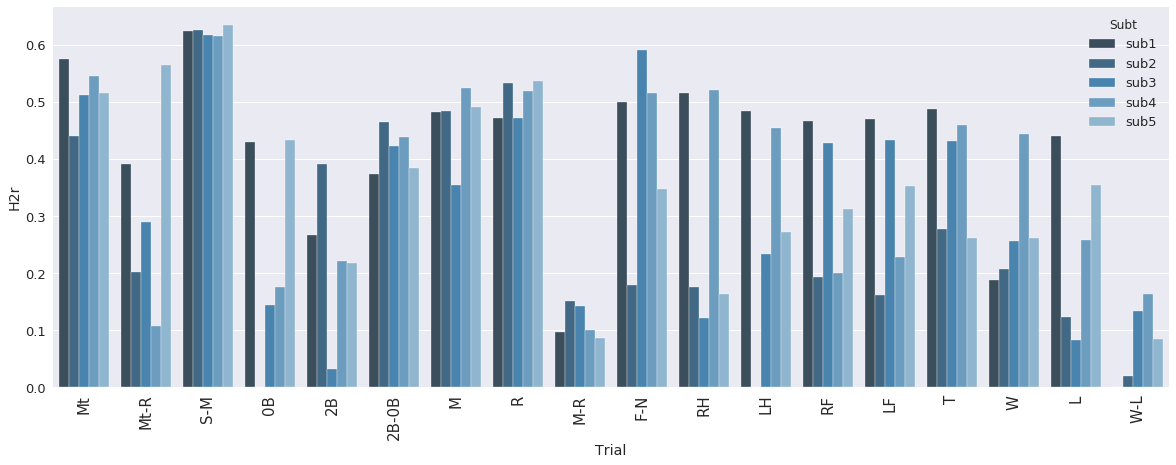

In [170]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44",
         "#c96d44"]
#coll_list = coll_ * len(df_all.Condition.unique())
coll_list = [plt.cm.jet(r,alpha=0.1) for r in h2r_df['H2r'] ]


plt.figure(figsize=(20,7))
sns.set_style("white")
sns.set(font_scale=1.3)
ax = sns.barplot(x='Trial', y='H2r', hue = 'Subt', palette="Blues_d", edgecolor='white', data=h2r_df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(15)

# Use custom colors and opacity
for bar in ax.artists:
    r, g, b, a = bar.get_facecolor()
    bar.set_facecolor((0, 0, 0, .1))
plt.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/heritability/all_tasks_barplot.svg'))


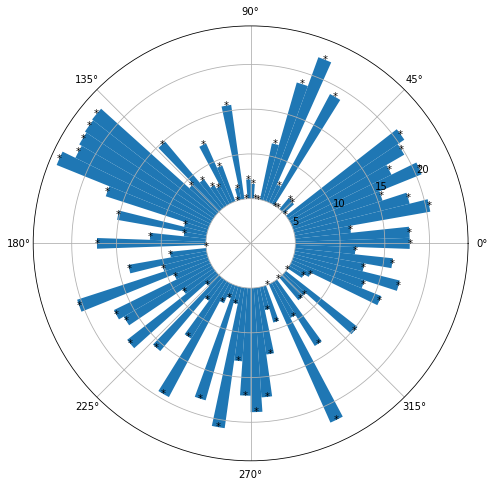

In [414]:
# main fig h2r
N = h2r_df['FDR_log10'].shape[0]
bottom = 5
max_height = 30

theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
#radii = preprocessing.normalize(h2r_df['FDR_log10'].values.reshape(1, -1), norm='l2')[0][:]
h2r_df_t = pd.DataFrame.copy(h2r_df)
h2r_df_t.loc[h2r_df_t['P'] > 0.05,'FDR_log10'] = 0
radii = h2r_df_t.FDR_log10.get_values()
width = (2*np.pi) / N
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=bottom)
#vline = ax.vlines(x=theta, ymin=bottom, ymax=radii+bottom,color='skyblue',alpha=0.5)
#vline.set_linestyle('dashed')
plot = ax.plot(theta,radii+bottom, "*",alpha = 0)
for ind in range(len(theta)):
    ax.text(theta[ind],radii[ind]+bottom, "*",
            horizontalalignment='center',
            verticalalignment='center')

f.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/heritability/all_tasks_fdr.svg'))

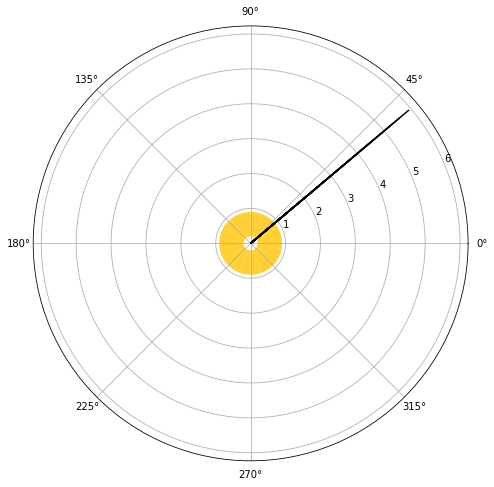

In [108]:
# back ground image
N = h2r_df['H2r'].shape[0]
bottom = 0.2
max_height = 1

theta = np.linspace(0.0, 2 * np.pi, int(N/5), endpoint=False)
#radii = max_height*np.random.rand(N)
radii = [0.7]*int(N/5)
width = (2*np.pi)/int(N/5)
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=bottom)
vline = ax.vlines(x=radii, ymin=0, ymax=theta)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.8)

Text(0,0.5,'Group')

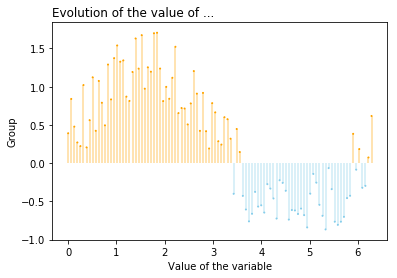

In [105]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.uniform(size=len(x)) - 0.2

# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')

# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)

# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

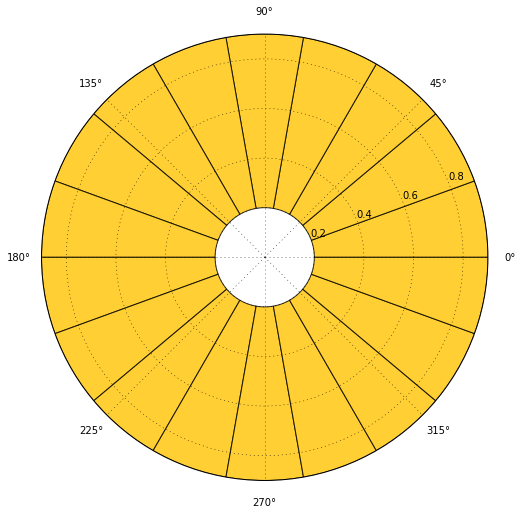

In [33]:
# back ground image
N = h2r_df['H2r'].shape[0]
bottom = 0.2
max_height = 1

theta = np.linspace(0.0, 2 * np.pi, int(N/5), endpoint=False)
#radii = max_height*np.random.rand(N)
radii = [0.7]*int(N/5)
width = (2*np.pi)/int(N/5)
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.8)
f.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/heritability/all_task_background.svg'))

In [14]:
h2r_df.Trial.describe()

count         90
unique        18
top       WM 2bk
freq           5
Name: Trial, dtype: object

In [15]:
h2r_df.Trial.tolist()

['REL match',
 'REL match',
 'REL match',
 'REL match',
 'REL match',
 'REL relation',
 'REL relation',
 'REL relation',
 'REL relation',
 'REL relation',
 'REL contrast relation vs match',
 'REL contrast relation vs match',
 'REL contrast relation vs match',
 'REL contrast relation vs match',
 'REL contrast relation vs match',
 'EMO contrast fear vs neut',
 'EMO contrast fear vs neut',
 'EMO contrast fear vs neut',
 'EMO contrast fear vs neut',
 'EMO contrast fear vs neut',
 'GAM contrast win vs loss',
 'GAM contrast win vs loss',
 'GAM contrast win vs loss',
 'GAM contrast win vs loss',
 'GAM contrast win vs loss',
 'GAM loss',
 'GAM loss',
 'GAM loss',
 'GAM loss',
 'GAM loss',
 'GAM win',
 'GAM win',
 'GAM win',
 'GAM win',
 'GAM win',
 'LAN story',
 'LAN story',
 'LAN story',
 'LAN story',
 'LAN story',
 'MOT rh',
 'MOT rh',
 'MOT rh',
 'MOT rh',
 'MOT rh',
 'MOT rf',
 'MOT rf',
 'MOT rf',
 'MOT rf',
 'MOT rf',
 'MOT t',
 'MOT t',
 'MOT t',
 'MOT t',
 'MOT t',
 'MOT lf',
 'MOT lf'

In [15]:
my_color

array(['skyblue', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'skyblue', 'orange',
       'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
       'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue',
       'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
       'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
       'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue',
       'skyblue', 'skyblue', 's

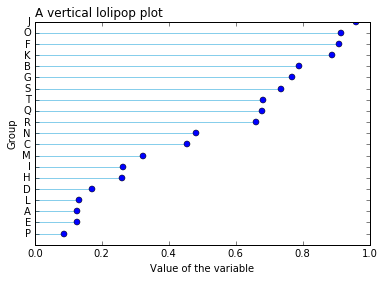

In [6]:

# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
